In [ ]:
pip install opendatasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od


In [ ]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: thushanmaduranga
Your Kaggle Key: ··········


100%|██████████| 7.63k/7.63k [00:00<00:00, 12.7MB/s]

In [ ]:
data=pd.read_csv("/content/random-linear-regression/test.csv")

In [ ]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
data.shape

(300, 2)

In [ ]:
x=data["x"]
y=data["y"]

In [ ]:
x

0      77
1      21
2      22
3      20
4      36
       ..
295    71
296    46
297    55
298    62
299    47
Name: x, Length: 300, dtype: int64

In [ ]:
y

0      79.775152
1      23.177279
2      25.609262
3      17.857388
4      41.849864
         ...    
295    68.545888
296    47.334876
297    54.090637
298    63.297171
299    52.459467
Name: y, Length: 300, dtype: float64

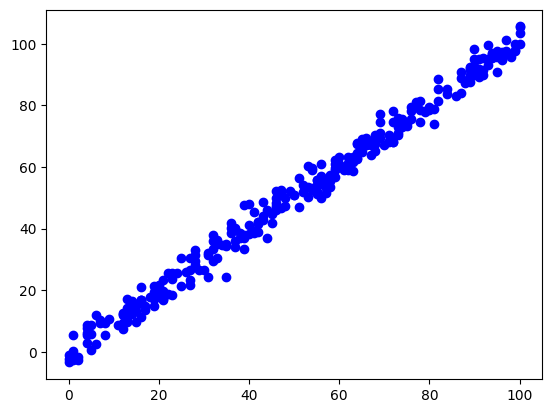

In [ ]:
plt.scatter(x,y,c="b")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((240,), (60,))

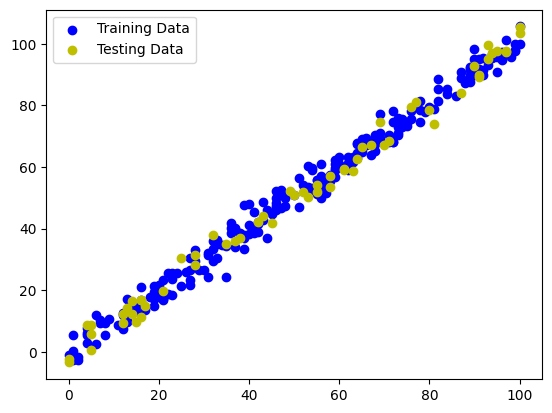

In [ ]:
plt.scatter(x_train, y_train, c="b", label="Training Data")
plt.scatter(x_test, y_test, c="y", label="Testing Data")
plt.legend()
plt.show()

Model Building

In [ ]:
#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [ ]:
#compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.05),
              metrics=["mae"])


In [ ]:
#train model
epochs_number = 10
history=model.fit(tf.expand_dims(x_train, axis = 1), y_train, epochs = epochs_number)

Epoch 1/10
8/8 [==============================] - 0s 5ms/step - loss: 2.5189 - mae: 2.5189
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 2.3808 - mae: 2.3808
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 2.4355 - mae: 2.4355
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 2.4030 - mae: 2.4030
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 2.4038 - mae: 2.4038
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 2.4863 - mae: 2.4863
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 2.5709 - mae: 2.5709
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 2.4692 - mae: 2.4692
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 2.4504 - mae: 2.4504
Epoch 10/10
8/8 [==============================] - 0s 5ms/step - loss: 2.4306 - mae: 2.4306


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                128       
                                                                 
 dense_21 (Dense)            (None, 10)                650       
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 789 (3.08 KB)
Trainable params: 789 (3.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_predictions = model.predict(x_test)
y_predictions[:5]

2/2 [==============================] - 0s 5ms/step


array([[91.68957 ],
       [77.445755],
       [95.75923 ],
       [ 5.209281],
       [92.706985]], dtype=float32)

In [ ]:
y_test.head(5)

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

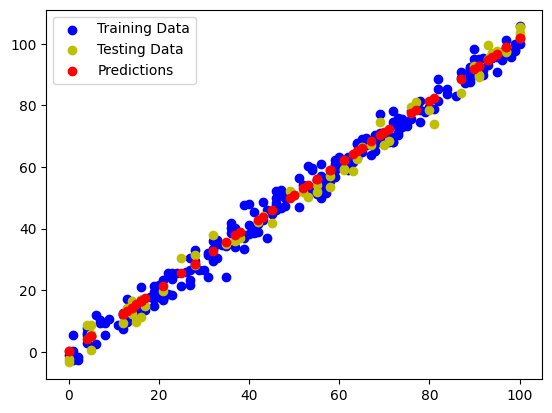

In [ ]:
plt.scatter(x_train, y_train, c ="b",label="Training Data")
plt.scatter(x_test, y_test, c="y", label = "Testing Data")
plt.scatter(x_test, y_predictions, c="r", label="Predictions")
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 2.6330 - mae: 2.6330


[2.633042335510254, 2.633042335510254]

In [ ]:
#Using MAE
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_predictions))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.6330423>

In [ ]:
#Using MSE
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_predictions))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=10.1009245>

In [ ]:
history.history

{'loss': [2.5188992023468018,
  2.3808298110961914,
  2.4354898929595947,
  2.4029643535614014,
  2.403846263885498,
  2.4862873554229736,
  2.570866107940674,
  2.4691572189331055,
  2.4504268169403076,
  2.4306070804595947],
 'mae': [2.5188992023468018,
  2.3808298110961914,
  2.4354898929595947,
  2.4029643535614014,
  2.403846263885498,
  2.4862873554229736,
  2.570866107940674,
  2.4691572189331055,
  2.4504268169403076,
  2.4306070804595947]}

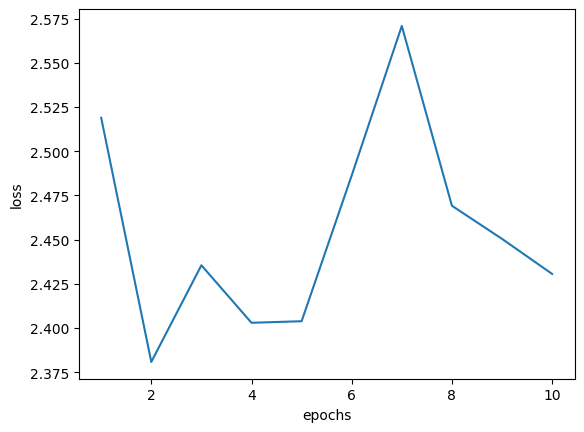

In [ ]:
x_range = range(1, epochs_number+1)
loss = history.history["loss"]
plt.plot(x_range,loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
for layer in model.layers:
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]
  print(f"\nWeights:\n {weights} \nBiases:\n{biases}")


Weights:
 [[ 0.09077318 -0.28298312 -0.19159204 -0.2280016  -0.12063786 -0.16835135
  -0.00218185 -0.10080203  0.16744752  0.04106488  0.07289278  0.10015123
  -0.09008414  0.28521234  0.11293835  0.0467794   0.28117436 -0.23965213
  -0.05950415  0.00258523 -0.20533532  0.01880263  0.23426542  0.15254627
  -0.07914065 -0.10877877 -0.26165444  0.13845067  0.12191862 -0.1064487
  -0.22419487  0.14424881  0.27105886  0.00768675  0.2782014   0.17685397
  -0.10115851  0.09587314  0.30712375 -0.02409323 -0.14138326 -0.23758896
   0.04139177  0.03704765  0.13238211 -0.08159372 -0.25440133  0.17234142
   0.21747623  0.061952   -0.08784913  0.11299499  0.09863409  0.10447598
   0.11692507 -0.25049803 -0.02893266  0.16680104  0.00551014  0.06809211
   0.04806333 -0.01839999 -0.02283291 -0.02558341]] 
Biases:
[ 0.00680878 -0.00705854 -0.00486894  0.01294849 -0.00682873  0.04101464
  0.01911465  0.01112436 -0.01977495 -0.01621151  0.00647358 -0.03109731
 -0.00631317  0.00571476 -0.03217421 -0.021